In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os.path
from glob import glob
from sklearn.datasets import load_files 
from tensorflow import keras
from keras.utils.np_utils import to_categorical


from keras.preprocessing import image                  
from tqdm import tqdm

from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import LabelEncoder


import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread


from skimage.transform import resize

Using TensorFlow backend.


In [5]:
batch_size = 20
img_height  = 128
img_widht = 128


def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = to_categorical(np.array(data['target']), 120)
    return dog_files, dog_targets

train_data_path = './dataset/cropped/train'
train_files, train_targets = load_dataset(train_data_path)

total_train = len(os.listdir(train_data_path))*0.7
total_valid = len(os.listdir(train_data_path))*0.3

train_image_generator = ImageDataGenerator(rescale=1./255,
    rotation_range=45,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)


train_generator = train_image_generator.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_widht),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') 

validation_generator = train_image_generator.flow_from_directory(
    train_data_path, # same directory as training data
    target_size=(img_height, img_widht),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') 

Found 14386 images belonging to 120 classes.
Found 6091 images belonging to 120 classes.


MODEL 

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_widht, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(GlobalAveragePooling2D())
model.add(Flatten()) 
model.add(Dense(120, activation = 'softmax'))
model.summary()
 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)      

In [13]:
#Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


hist = model.fit(train_generator,
                 epochs=250, 
                  validation_data = validation_generator)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 720 steps, validate for 305 steps
Epoch 1/250
720/720 [==============================] - 82s 115ms/step - loss: 4.7436 - accuracy: 0.0133 - val_loss: 4.6189 - val_accuracy: 0.0225
Epoch 2/250
720/720 [==============================] - 95s 132ms/step - loss: 4.4601 - accuracy: 0.0302 - val_loss: 4.3981 - val_accuracy: 0.0374
Epoch 3/250
720/720 [==============================] - 97s 135ms/step - loss: 4.2917 - accuracy: 0.0439 - val_loss: 4.2515 - val_accuracy: 0.0465
Epoch 4/250
720/720 [==============================] - 103s 143ms/step - loss: 4.1470 - accuracy: 0.0614 - val_loss: 4.1484 - val_accuracy: 0.0645
Epoch 5/250
720/720 [==============================] - 97s 135ms/step - loss: 4.0018 - accuracy: 0.0758 - val_loss: 3.9732 - val_accuracy: 0.0862
Epoch 6/250
720/720 [==============================] - 100s 140ms/step - loss: 3.8720 - accuracy: 0.0931 - val_loss: 3.8770 - val_accuracy: 0.0965
Epoch 7/250
720/720 [=======

720/720 [==============================] - 107s 148ms/step - loss: 1.7420 - accuracy: 0.5114 - val_loss: 3.0387 - val_accuracy: 0.3090
Epoch 111/250
720/720 [==============================] - 104s 145ms/step - loss: 1.7492 - accuracy: 0.5106 - val_loss: 3.0835 - val_accuracy: 0.3105
Epoch 112/250
720/720 [==============================] - 98s 136ms/step - loss: 1.7277 - accuracy: 0.5140 - val_loss: 3.1553 - val_accuracy: 0.3087
Epoch 113/250
720/720 [==============================] - 102s 141ms/step - loss: 1.7305 - accuracy: 0.5175 - val_loss: 3.0856 - val_accuracy: 0.2985
Epoch 114/250
720/720 [==============================] - 105s 145ms/step - loss: 1.7456 - accuracy: 0.5097 - val_loss: 3.0325 - val_accuracy: 0.3059
Epoch 115/250
720/720 [==============================] - 103s 143ms/step - loss: 1.7249 - accuracy: 0.5172 - val_loss: 3.0980 - val_accuracy: 0.3141
Epoch 116/250
720/720 [==============================] - 101s 140ms/step - loss: 1.7283 - accuracy: 0.5176 - val_loss: 3.

720/720 [==============================] - 105s 146ms/step - loss: 1.4928 - accuracy: 0.5743 - val_loss: 3.0795 - val_accuracy: 0.3307
Epoch 221/250
720/720 [==============================] - 116s 161ms/step - loss: 1.4797 - accuracy: 0.5696 - val_loss: 3.1008 - val_accuracy: 0.3279
Epoch 222/250
720/720 [==============================] - 107s 149ms/step - loss: 1.4975 - accuracy: 0.5662 - val_loss: 3.1783 - val_accuracy: 0.3128
Epoch 223/250
720/720 [==============================] - 101s 140ms/step - loss: 1.4888 - accuracy: 0.5719 - val_loss: 3.2383 - val_accuracy: 0.3198
Epoch 224/250
720/720 [==============================] - 109s 151ms/step - loss: 1.4804 - accuracy: 0.5749 - val_loss: 3.0920 - val_accuracy: 0.3270
Epoch 225/250
720/720 [==============================] - 107s 149ms/step - loss: 1.4717 - accuracy: 0.5772 - val_loss: 3.1370 - val_accuracy: 0.3187
Epoch 226/250
720/720 [==============================] - 107s 149ms/step - loss: 1.4823 - accuracy: 0.5722 - val_loss: 3

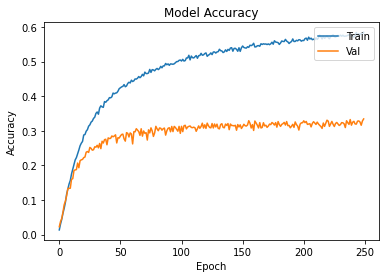

In [14]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

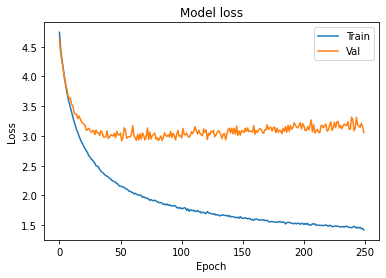

In [15]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [16]:
#Sauvegarde du model en h5
model.save('model128ep250.h5')

In [17]:
#Sauvegarde du model en dossier .b
model.save('model.b')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model.b/assets
